In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("/home/deepp/rebelway/week03/train.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# clean up data

In [5]:
tmp = {"Age": np.floor(df["Age"].mean()), "Embarked": "C"}
df.fillna(value=tmp,inplace=True)
df.dropna(axis=1,inplace=True)
df.drop(["Name"], axis=1,inplace=True)
mappingSex = {"male": 0, "female": 1}
mappingEmb = {"S": 0, "C": 1, "Q": 2 }
df.replace({"Sex": mappingSex, "Embarked": mappingEmb}, inplace=True)
df["Ticket"] = df["Ticket"].str.split().str[-1]
df["Ticket"] = pd.to_numeric(df["Ticket"], errors="coerce")
df["Age"] = df["Age"].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       887 non-null    float64
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


/tmp/ipykernel_3506/978658965.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Sex": mappingSex, "Embarked": mappingEmb}, inplace=True)


In [6]:
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,0,22,1,0,21171.0,7.2500,0
1,2,1,1,1,38,1,0,17599.0,71.2833,1
2,3,1,3,1,26,0,0,3101282.0,7.9250,0
3,4,1,1,1,35,1,0,113803.0,53.1000,0
4,5,0,3,0,35,0,0,373450.0,8.0500,0
5,6,0,3,0,29,0,0,330877.0,8.4583,2
6,7,0,1,0,54,0,0,17463.0,51.8625,0
7,8,0,3,0,2,3,1,349909.0,21.0750,0
8,9,1,3,1,27,0,2,347742.0,11.1333,0
9,10,1,2,1,14,1,0,237736.0,30.0708,1


In [58]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# PANDAS

# SURVIVED BY AGE

<Axes: xlabel='Age', ylabel='Survived'>

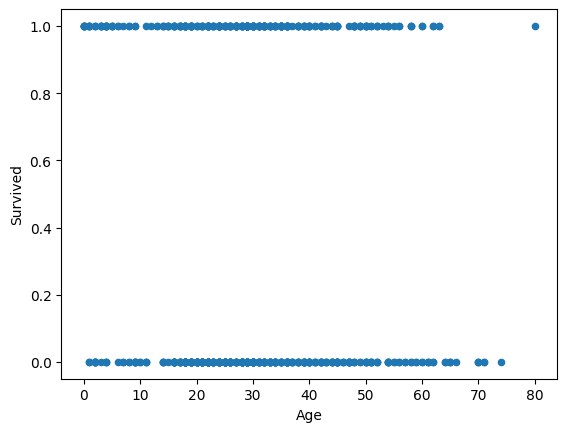

In [59]:
df.plot(x="Age", y="Survived", kind="scatter")

# MEAN FARE BY AGE

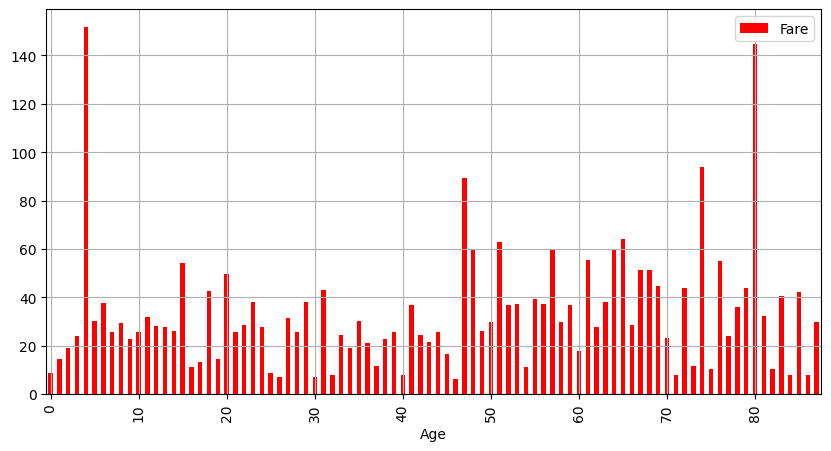

In [125]:
df.groupby("Age").mean().plot(y="Fare", kind='bar', rot=90, figsize=(10,5), grid=True, xticks=np.arange(0, max(df["Age"]+1), 10), color="red");

In [126]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,8.870000e+02,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.560236,0.523008,0.381594,2.983284e+05,32.204208,0.363636
std,257.353842,0.486592,0.836071,0.477990,13.005010,1.102743,0.806057,6.576144e+05,49.693429,0.636159
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,1.487900e+04,7.910400,0.000000
50%,446.000000,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,1.122770e+05,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,3.470820e+05,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,3.101317e+06,512.329200,2.000000


# SURVIVED PER AGE 

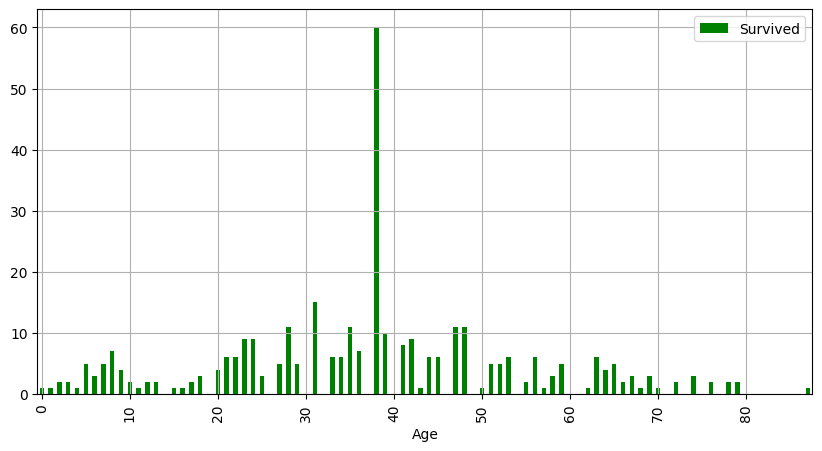

In [128]:
df.groupby("Age").sum().plot(y="Survived", kind='bar', rot=90, figsize=(10,5), grid=True, xticks=np.arange(0, max(df["Age"]+1), 10), color="green");

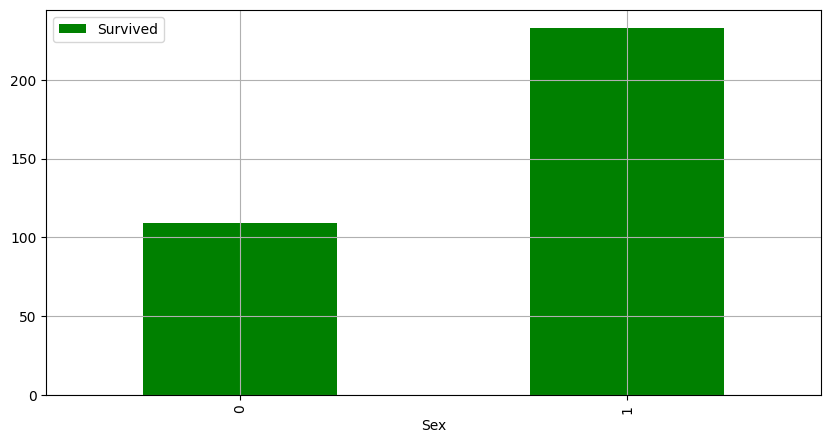

In [129]:
df.groupby("Sex").sum().plot(y="Survived", kind='bar', rot=90, figsize=(10,5), grid=True, color="green");

# MATPLOTLIB

# FARE PER CLASS

In [130]:
x = df["Pclass"]
y = df["Fare"]

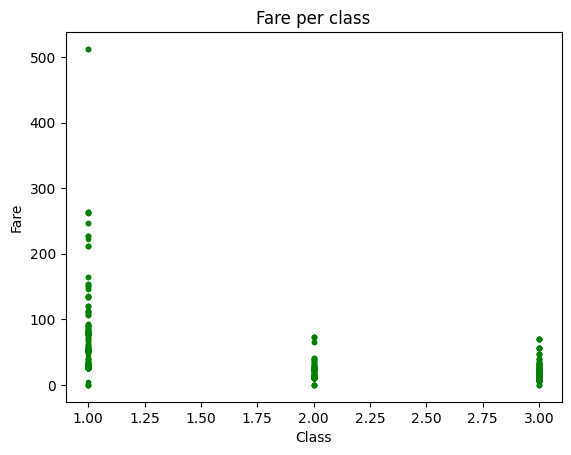

In [131]:
plt.plot(x,y,"g.")
plt.xlabel("Class")
plt.ylabel("Fare")
plt.title("Fare per class")
plt.show()

# CORRELATION BETWEEN: 
# -SEX AND FARE  
# -AGE AND FARE

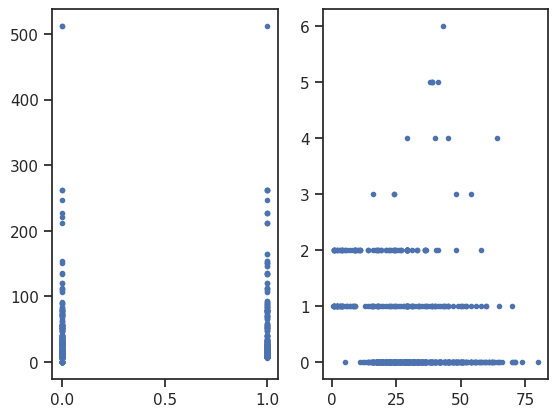

In [147]:
x = df["Sex"]
y = df["Fare"]
plt.subplot(1,2,1)
plt.plot(x,y,".")

x = df["Age"]
y = df["Parch"]
plt.subplot(1,2,2)
plt.plot(x,y,"b.")
plt.show()


# AGE HISTOGRAM

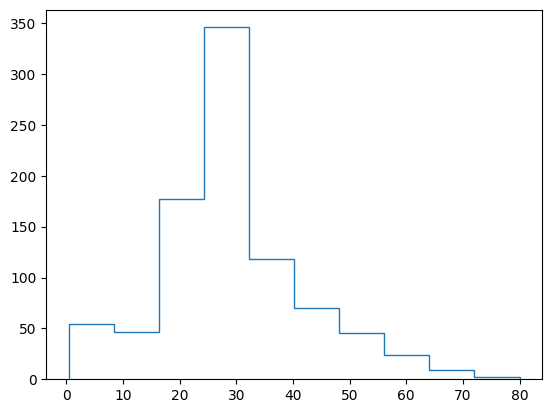

In [133]:
plt.hist(df["Age"], histtype="step" ) 
plt.show() 

# SEABORN

In [18]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22,7.2500,0,1,0,3,2.0,0
1,2,38,71.2833,1,1,0,1,0.0,1
2,3,26,7.9250,1,0,0,3,2.0,1
3,4,35,53.1000,1,1,0,1,2.0,1
4,5,35,8.0500,0,0,0,3,2.0,0


# CORRELATION BETWEEN AGE AND FARE AND HIGHLIGHT OF SURVIVED

<Axes: xlabel='Age', ylabel='Fare'>

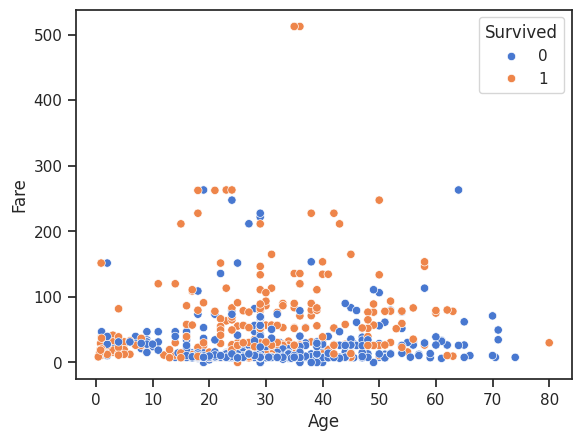

In [134]:
sns.set_theme(style="ticks")
sns.scatterplot(data=df, x="Age", y="Fare", palette="muted", hue="Survived")

# FARE PER CLASS SPLIT BY SEX

<Axes: xlabel='Pclass', ylabel='Fare'>

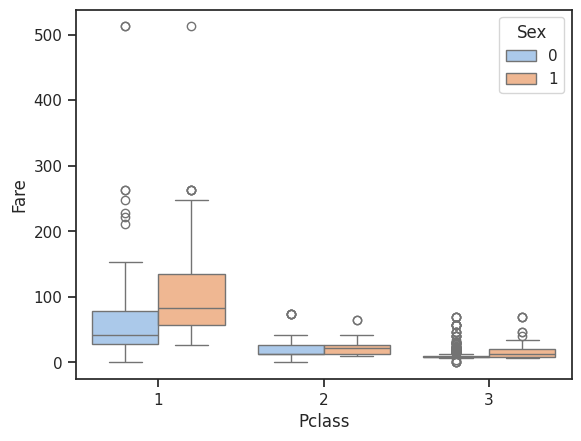

In [135]:
sns.set_theme(style="ticks")
sns.boxplot(data=df, x="Pclass", y="Fare", palette="pastel", hue="Sex")

# AGE DISTRIBUTION SPLIT BY SEX

<Axes: xlabel='Age', ylabel='Density'>

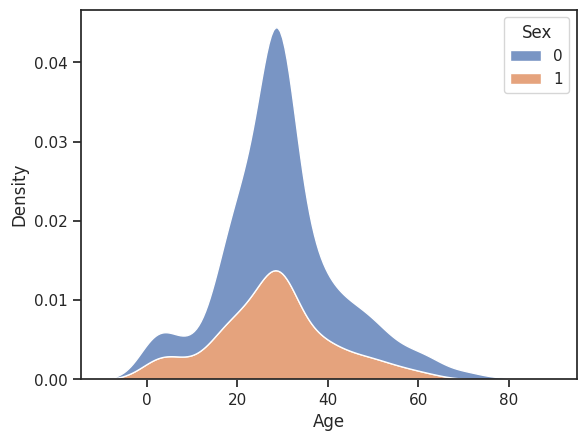

In [136]:
sns.kdeplot(data=df, x="Age", hue="Sex", multiple="stack",  palette="deep")

# CORRELATION BETWEEN AGE AND FARE AND HIGHLIGHT OF SURVIVED

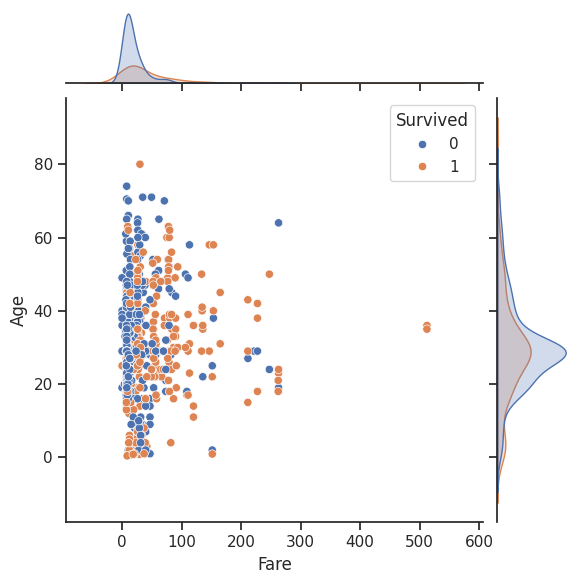

In [137]:
sns.jointplot(data=df, x="Fare", y="Age",hue="Survived")

# RELARIONAL PLOT AGE AND FARE

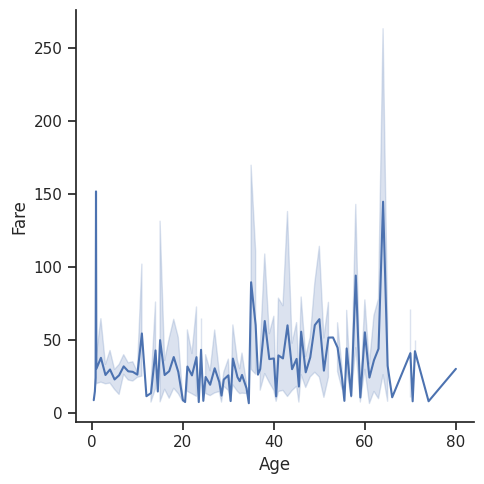

In [138]:
sns.set_theme(style="ticks")
sns.relplot(data=df, x="Age", y="Fare", kind="line")